# Exploring Ntuple

Ok, so Manuel has this step that's going to make it a lot easier to train rapidly since he has this step that goes *directly* from DAODs to hdf5 files. Jonathan also told me that this would speed up the process a lot.

My goal in this notebook is just to make sure that I understand
1. How to open the dataset
2. How to look at what is inside it


In [1]:
import numpy as np
import h5py

from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
# dataDir = "/u/ki/nhartman/gpfs/public/dl1/mc16d_Topo_Zprime_1.5TeV/"
# dataDir+= "user.mguth.427080.btagTraining.e5362_s3126_r10201_p3703.EMTopo.2019-01-09-T114557-R7482_output.h5.224997320/"
# dataFile = "user.mguth.16680339._000004.output.h5"

dataDir = "/u/ki/nhartman/gpfs/public/dl1/"
dataFile = "output.h5"

dl1 = h5py.File(dataDir+dataFile,"r")

In [3]:
for k in dl1.keys():
    print(k)

jets
tracks


In [4]:
jet_np = dl1['jets'][:]
trk_np = dl1['tracks'][:]

First, look at the jet variables in the Ntuple

In [5]:
for var in jet_np.dtype.names:
    print(var)

MV2c10_discriminant
MV2r_discriminant
MV2rmu_discriminant
DL1_pu
DL1_pc
DL1_pb
DL1r_pu
DL1r_pc
DL1r_pb
DL1rmu_pu
DL1rmu_pc
DL1rmu_pb
IP2D_pu
IP2D_pc
IP2D_pb
IP3D_pu
IP3D_pc
IP3D_pb
SV1_pu
SV1_pc
SV1_pb
rnnip_pu
rnnip_pc
rnnip_pb
rnnip_ptau
pt_uncalib
eta_uncalib
abs_eta_uncalib
IP2D_cu
IP2D_bu
IP2D_bc
IP3D_cu
IP3D_bu
IP3D_bc
secondaryVtx_m
secondaryVtx_E
secondaryVtx_EFrac
secondaryVtx_min_trk_flightDirRelEta
secondaryVtx_max_trk_flightDirRelEta
secondaryVtx_avg_trk_flightDirRelEta
min_trk_flightDirRelEta
max_trk_flightDirRelEta
avg_trk_flightDirRelEta
SMT_discriminant
JetFitter_energyFraction
JetFitter_mass
JetFitter_significance3d
JetFitter_deltaphi
JetFitter_deltaeta
JetFitter_massUncorr
JetFitter_dRFlightDir
SV1_masssvx
SV1_efracsvx
SV1_significance3d
SV1_dstToMatLay
SV1_deltaR
SV1_Lxy
SV1_L3d
JetFitter_deltaR
secondaryVtx_L3d
secondaryVtx_Lxy
SMT_mu_pt
SMT_dR
SMT_qOverPratio
SMT_mombalsignif
SMT_scatneighsignif
SMT_pTrel
SMT_mu_d0
SMT_mu_z0
SMT_ID_qOverP
iprnn_pu
iprnn_pc
iprnn_pb

In [36]:
import pandas as pd
import xarray as xr

In [37]:
?pd.DataFrame

In [38]:
jet_df = pd.DataFrame(jet_np)

In [39]:
jet_df.head()

MV2c10_discriminant  MV2r_discriminant  MV2rmu_discriminant    DL1_pu  \
0            -0.750139          -0.852374            -0.836519  0.617611   
1            -0.937814          -0.855601            -0.812067  0.670309   
2            -0.616861          -0.592699            -0.629131  0.551369   
3            -0.903721          -0.914897            -0.879898  0.655703   
4             0.962517           0.920420             0.981853  0.016670   

     DL1_pc    DL1_pb   DL1r_pu   DL1r_pc   DL1r_pb  DL1rmu_pu     ...       \
0  0.323674  0.058715  0.639449  0.300990  0.059561   0.634895     ...        
1  0.299578  0.030113  0.576407  0.344699  0.078894   0.571766     ...        
2  0.347834  0.100797  0.434944  0.416854  0.148202   0.350960     ...        
3  0.307406  0.036891  0.636114  0.301983  0.061903   0.650751     ...        
4  0.319371  0.663959  0.047434  0.366584  0.585982   0.015038     ...        

   IP3D_nTrks  GhostBHadronsFinalPt  GhostBHadronsFinalCount  \
0         6.0              0.000000                        0   
1         5.0              0.000000                        0   
2         5.0              0.000000                        0   
3         5.0              0.000000                        0   
4         6.0          98811.492188                        1   

   GhostCHadronsFinalCount  HadronConeExclTruthLabelID  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        1                           5   

   HadronConeExclExtendedTruthLabelID             pt       eta  mcEventWeight  \
0                                   0  136878.453125  0.131339     736.323853   
1                                   0   66582.960938  0.858607     736.323853   
2                                   0   39824.847656  0.737296     736.323853   
3                                   0   26896.998047  0.581423     736.323853   
4                                   5   98875.289062  0.123874     736.323853   

   eventNumber  
0    374557519  
1    374557519  
2    374557519  
3    374557519  
4    374558722  

[5 rows x 99 columns]

In [41]:
trk_np.shape

(121465, 15)

In [42]:
trk_np.dtype.names

('chiSquared',
 'numberDoF',
 'IP3D_signed_d0',
 'IP2D_signed_d0',
 'IP3D_signed_z0',
 'IP3D_signed_d0_significance',
 'IP3D_signed_z0_significance',
 'IP2D_grade',
 'IP3D_grade',
 'numberOfInnermostPixelLayerHits',
 'numberOfNextToInnermostPixelLayerHits',
 'numberOfInnermostPixelLayerSharedHits',
 'numberOfInnermostPixelLayerSplitHits',
 'numberOfPixelHits',
 'numberOfPixelHoles',
 'numberOfPixelSharedHits',
 'numberOfPixelSplitHits',
 'numberOfSCTHits',
 'numberOfSCTHoles',
 'numberOfSCTSharedHits',
 'pt',
 'eta',
 'deta',
 'dphi',
 'dr',
 'ptfrac')

In [45]:
?np.stack

In [47]:
arrs = [trk_np[x] for x in trk_np.dtype.names]
vals = np.stack(arrs,axis=-1)

In [49]:
vals.shape

(121465, 15, 26)

In [50]:
N,nTrks = trk_np.shape

trk_xr = xr.DataArray(vals,coords=[('jet',np.arange(N)),
                                  ('trk',np.arange(nTrks)),
                                  ('var',list(trk_np.dtype.names))])

Next, look at the trk variables.

In [7]:
for var in trk_np.dtype.names:
    print(var)

chiSquared
numberDoF
IP3D_signed_d0
IP2D_signed_d0
IP3D_signed_z0
IP3D_signed_d0_significance
IP3D_signed_z0_significance
IP2D_grade
IP3D_grade
numberOfInnermostPixelLayerHits
numberOfNextToInnermostPixelLayerHits
numberOfInnermostPixelLayerSharedHits
numberOfInnermostPixelLayerSplitHits
numberOfPixelHits
numberOfPixelHoles
numberOfPixelSharedHits
numberOfPixelSplitHits
numberOfSCTHits
numberOfSCTHoles
numberOfSCTSharedHits
pt
eta
deta
dphi
dr
ptfrac


In [8]:
jet_np['pt'].shape

(121465,)

So there are about 600k jets in the file

In [9]:
trk_np.shape

(121465, 15)

There are the same number of tracks, I'm not sure what the "10" stands for, since there are definitely more than 10 track features.

In [10]:
trk_np['pt'].shape

(121465, 15)

This looks like an array of lists?

Ok, so at this point the tracks in the jet have not been flattened.

I can still select the IP3D tracks using the IP3D_grade variable

In [11]:
trk_np['pt'][0]

array([ 2009.7758,  2096.8545, 36476.367 , 12247.69  , 10134.04  ,
       10638.453 ,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan],
      dtype=float32)

I.e, the first jet has 10 tracks. This seems kind of low?

In [12]:
trk_np['IP3D_grade'][0]

array([13, 13, 13, 13, 13, 13, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int32)

So there are only three tracks selected by IP3D.

**Also, the default value for non-ip3d tracks changed from the MV2c10 Ntuples.**
(Before it was -10.)

### Sanity check: Are the jet and track variables lined up?

To test this, I could crecalulate the $p_T^{frac}$ variable to ensure that it's the same as what has been saved.

**Q: Is pt the uncalibrated jet $p_T$?**

- `pt` is the calibrated jet $p_T$
- `pt_uncalib` is the original jet $p_T$

In [13]:
ijet = 100

jpt = jet_np['pt'][ijet]

for tpt, ptfrac in zip(trk_np['pt'][ijet],trk_np['ptfrac'][ijet]):
    print('Ntuple ptfrac: {:.16f}, derived ptfrac: {:.16f}'.format(ptfrac, tpt/jpt))

Ntuple ptfrac: 0.0920478254556656, derived ptfrac: 0.0839739516377449
Ntuple ptfrac: 0.0468778386712074, derived ptfrac: 0.0427660010755062
Ntuple ptfrac: 0.1245523095130920, derived ptfrac: 0.1136273443698883
Ntuple ptfrac: 0.0377822220325470, derived ptfrac: 0.0344681963324547
Ntuple ptfrac: 0.0988229885697365, derived ptfrac: 0.0901548415422440
Ntuple ptfrac: 0.1345926225185394, derived ptfrac: 0.1227869838476181
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan


Ok, yes, this looks good, they are in fact lined up!

In [14]:
ijet = 100

jpt = jet_np['pt_uncalib'][ijet]

for tpt, ptfrac in zip(trk_np['pt'][ijet],trk_np['ptfrac'][ijet]):
    print('Ntuple ptfrac: {:.16f}, derived ptfrac: {:.16f}'.format(ptfrac, tpt/jpt))

Ntuple ptfrac: 0.0920478254556656, derived ptfrac: 0.0920478254556656
Ntuple ptfrac: 0.0468778386712074, derived ptfrac: 0.0468778386712074
Ntuple ptfrac: 0.1245523095130920, derived ptfrac: 0.1245523095130920
Ntuple ptfrac: 0.0377822220325470, derived ptfrac: 0.0377822220325470
Ntuple ptfrac: 0.0988229885697365, derived ptfrac: 0.0988229885697365
Ntuple ptfrac: 0.1345926225185394, derived ptfrac: 0.1345926374197006
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan
Ntuple ptfrac: nan, derived ptfrac: nan


**Bad news:** The ptfrac variable that is stored in the Ntuple is using the calibrated jet $p_T$, so we'll have to rederive it ;(

I think I should also check $\Delta R$

**Question:** Are there $\tau$s inside this dataset?

In [15]:
(jet_np['HadronConeExclTruthLabelID']==15).sum()

4606

In [16]:
jet_np.shape[0]

121465

Yes, there are $\tau$s, they just weren't training on them.

**Next:** Just a bit of debugging - I want to make sure I understand the best way to implement this!

- Good news, this format for the data is already flat in terms of the track Ntuples.


In [17]:
nJets = jet_np.shape[0]
nJets

121465

**Goal:** Create an array for the tracks that has the same # of tracks.

What I need to implement:
- Apply the IP3D cuts
- Sort by $s_{d0}$
- Use Keras's `pad_sequences` method

In [18]:
for var in trk_np.dtype.names:
    print(var,trk_np[var][0])

chiSquared [58.03312  34.16711  32.271362 37.481464 44.54728  61.818184       nan
       nan       nan       nan       nan       nan       nan       nan
       nan]
numberDoF [45. 39. 46. 44. 47. 50. nan nan nan nan nan nan nan nan nan]
IP3D_signed_d0 [ 0.0835536   0.01898908 -0.00162999 -0.00366412 -0.00828296 -0.02758308
         nan         nan         nan         nan         nan         nan
         nan         nan         nan]
IP2D_signed_d0 [ 0.0835536   0.01898908  0.00162999 -0.00366412  0.00828296  0.02758308
         nan         nan         nan         nan         nan         nan
         nan         nan         nan]
IP3D_signed_z0 [-0.06138176 -0.00628903 -0.03972716 -0.07915965 -0.04979901 -0.07165357
         nan         nan         nan         nan         nan         nan
         nan         nan         nan]
IP3D_signed_d0_significance [ 2.060181    0.35856092 -0.17435186 -0.19903676 -0.5073297  -1.5770727
         nan         nan         nan         nan         nan      

In [19]:
import sys
sys.path.append("../../../joint_rnnip_dl1/")

from preprocessing import get_sort_index

In [20]:
tVars = ['IP3D_signed_d0_significance','IP3D_signed_z0_significance',
         'numberOfNextToInnermostPixelLayerHits','numberOfInnermostPixelLayerHits',
         'numberOfInnermostPixelLayerSharedHits','numberOfInnermostPixelLayerSplitHits',
         'numberOfPixelSharedHits','numberOfPixelSplitHits','numberOfSCTSharedHits',
         'ptfrac','dr',
         'numberOfPixelHits','numberOfSCTHits']

output_trk_array = {k:[] for k in tVars}

sort_var = 'IP3D_signed_d0_significance'
sort_flag = 'sd0_rev'

for ijet in range(5):
    
    # Select the ip3d tracks
    # Tracks that are not used by IP3D have their grade set to -1
    ip3d_mask = (trk_np['IP3D_grade'][ijet] != -1)
    print(ip3d_mask)
    # Sort by sd0
    sort_idx = get_sort_index(trk_np[sort_var][ijet][ip3d_mask],sort_type=sort_flag)
    print(sort_idx)
    
    for tvar in tVars:
        print(tvar,trk_np[tvar][ijet])
        #output_trk_array[tvar].append(trk_np[tvar][ijet][ip3d_mask][sort_idx])
    break

[ True  True  True  True  True  True False False False False False False
 False False False]
[0 1 2 3 4 5]
IP3D_signed_d0_significance [ 2.060181    0.35856092 -0.17435186 -0.19903676 -0.5073297  -1.5770727
         nan         nan         nan         nan         nan         nan
         nan         nan         nan]
IP3D_signed_z0_significance [-0.6010702  -0.06337654 -0.5587917  -1.176101   -0.69729275 -0.8607603
         nan         nan         nan         nan         nan         nan
         nan         nan         nan]
numberOfNextToInnermostPixelLayerHits [1 1 2 1 2 1 0 0 0 0 0 0 0 0 0]
numberOfInnermostPixelLayerHits [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
numberOfInnermostPixelLayerSharedHits [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
numberOfInnermostPixelLayerSplitHits [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
numberOfPixelSharedHits [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
numberOfPixelSplitHits [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
numberOfSCTSharedHits [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
ptfrac [0.01484976 0.01549316 0.2

In [21]:
trk_np['IP3D_grade'][ijet]

array([13, 13, 13, 13, 13, 13, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int32)

After selecting the ip3d tracks, pad the sequences.

In [22]:
trk_vars_flat = []
nTrks = 15
for v in tVars:
    padded = pad_sequences(output_trk_array[v], maxlen=nTrks,
                           padding='post', truncating='post',dtype=np.float32)
    trk_vars_flat.append(padded.reshape(-1,nTrks,1))

    print(v,trk_vars_flat[-1].shape)

trk_np_flat = np.concatenate(trk_vars_flat,axis=2)


IP3D_signed_d0_significance (0, 15, 1)
IP3D_signed_z0_significance (0, 15, 1)
numberOfNextToInnermostPixelLayerHits (0, 15, 1)
numberOfInnermostPixelLayerHits (0, 15, 1)
numberOfInnermostPixelLayerSharedHits (0, 15, 1)
numberOfInnermostPixelLayerSplitHits (0, 15, 1)
numberOfPixelSharedHits (0, 15, 1)
numberOfPixelSplitHits (0, 15, 1)
numberOfSCTSharedHits (0, 15, 1)
ptfrac (0, 15, 1)
dr (0, 15, 1)
numberOfPixelHits (0, 15, 1)
numberOfSCTHits (0, 15, 1)


In [23]:
trk_np_flat

array([], shape=(0, 15, 13), dtype=float32)

In [24]:
trk_np_flat.shape

(0, 15, 13)

In [25]:
jet_np[:6].shape

(6,)

**Look into the scaling for the jet variables**

Ok, so there might be this possibility to scale the jet variables with the standard scalar function, and that would make the code a lot cleaner.

**Sanity check**

Plot the distributions for the track variables to make sure stuff makes sense!

In [26]:
trk_vars_flat = []
nTrks = 15
for v in tVars:
    padded = pad_sequences(trk_np[v], maxlen=nTrks,
                           padding='post', truncating='post',dtype=np.float32)
    trk_vars_flat.append(padded.reshape(-1,nTrks,1))

    print(v,trk_vars_flat[-1].shape)

trk_np_flat = np.concatenate(trk_vars_flat,axis=2)

IP3D_signed_d0_significance (121465, 15, 1)
IP3D_signed_z0_significance (121465, 15, 1)
numberOfNextToInnermostPixelLayerHits (121465, 15, 1)
numberOfInnermostPixelLayerHits (121465, 15, 1)
numberOfInnermostPixelLayerSharedHits (121465, 15, 1)
numberOfInnermostPixelLayerSplitHits (121465, 15, 1)
numberOfPixelSharedHits (121465, 15, 1)
numberOfPixelSplitHits (121465, 15, 1)
numberOfSCTSharedHits (121465, 15, 1)
ptfrac (121465, 15, 1)
dr (121465, 15, 1)
numberOfPixelHits (121465, 15, 1)
numberOfSCTHits (121465, 15, 1)


In [27]:
?np.nan_to_num

In [28]:
trk_np_flat = np.nan_to_num(trk_np_flat)

In [29]:
trk_np_flat.shape

(121465, 15, 13)

In [30]:
mask = (trk_np_flat.sum(axis=-1)!=0)

In [31]:
nTrks_ip3d = mask.sum(axis=1)

In [32]:
import matplotlib.pyplot as plt

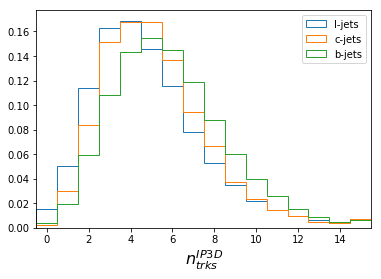

In [33]:
for pdg,label in zip([0,4,5],['l','c','b']):
    plt.hist(nTrks_ip3d[jet_np['HadronConeExclTruthLabelID']==pdg],
             range=(-0.5,15.5),bins=16,histtype='step',density=True,
             label='{}-jets'.format(label))
plt.xlim(-0.5,15.5)  
plt.xlabel('$n_{trks}^{IP3D}$',fontsize=16)
plt.legend()
plt.show()

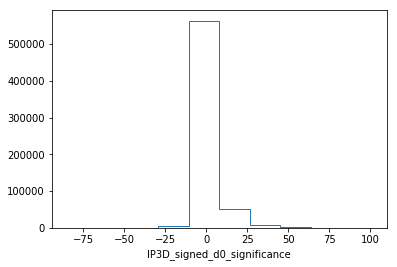

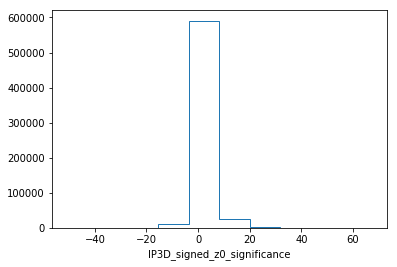

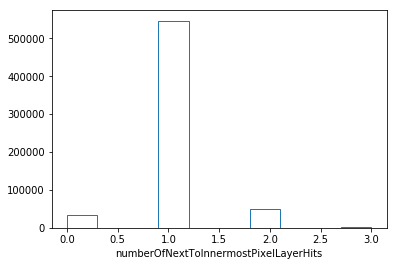

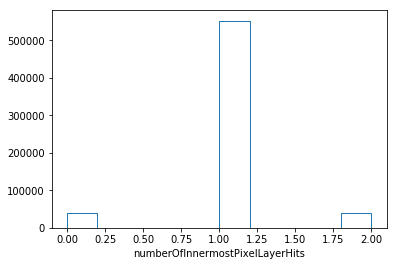

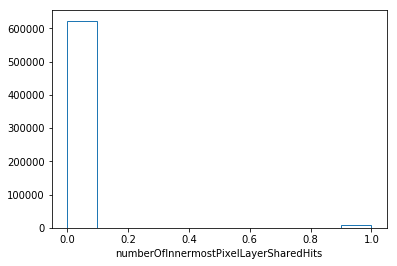

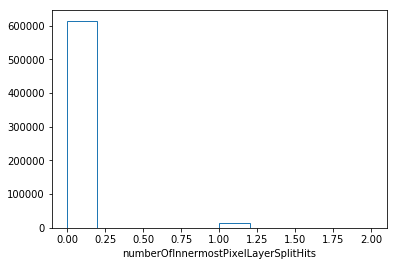

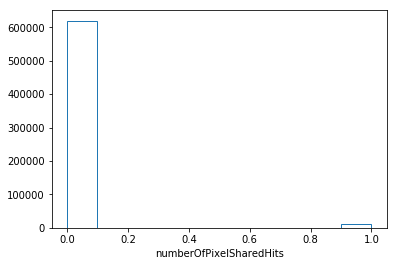

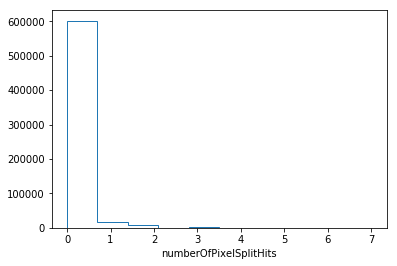

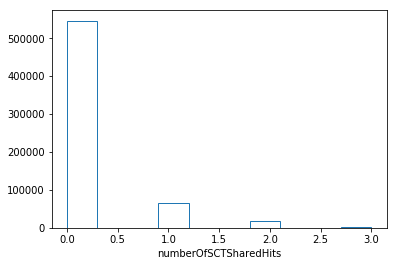

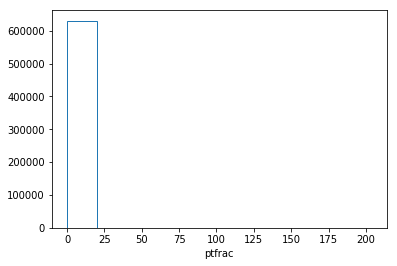

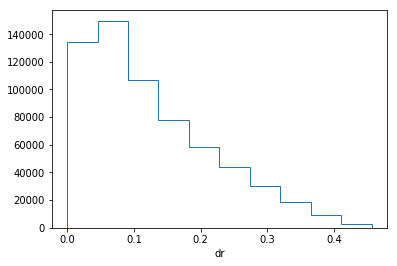

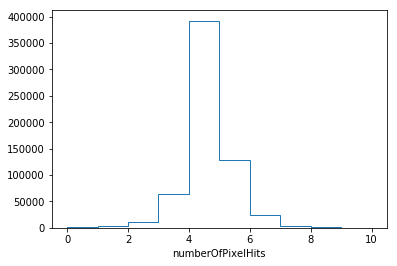

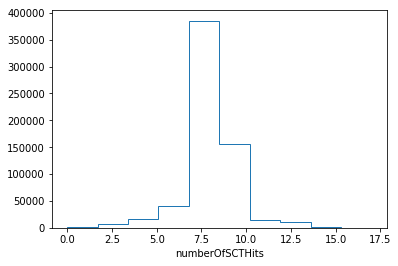

In [34]:
for i,var in enumerate(tVars):
    plt.figure()
    plt.hist(trk_np_flat[:,:,i][mask],histtype='step')
    plt.xlabel(var)

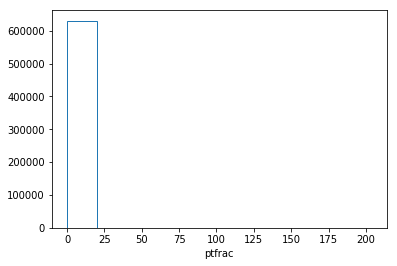

In [35]:
i=-4

plt.hist(trk_np_flat[:,:,i][mask],histtype='step')
plt.xlabel(tVars[i])
plt.show()